<a href="https://colab.research.google.com/github/Ashwini028/EDA/blob/main/Time_Series_Analysis_Stock_market_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TIME SERIES ANALYSIS

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [5]:
# Load data

df = pd.read_csv('/yahoo_stock.csv')
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [6]:
  # Convert date column to datetime and drop missing values
  df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.dropna()

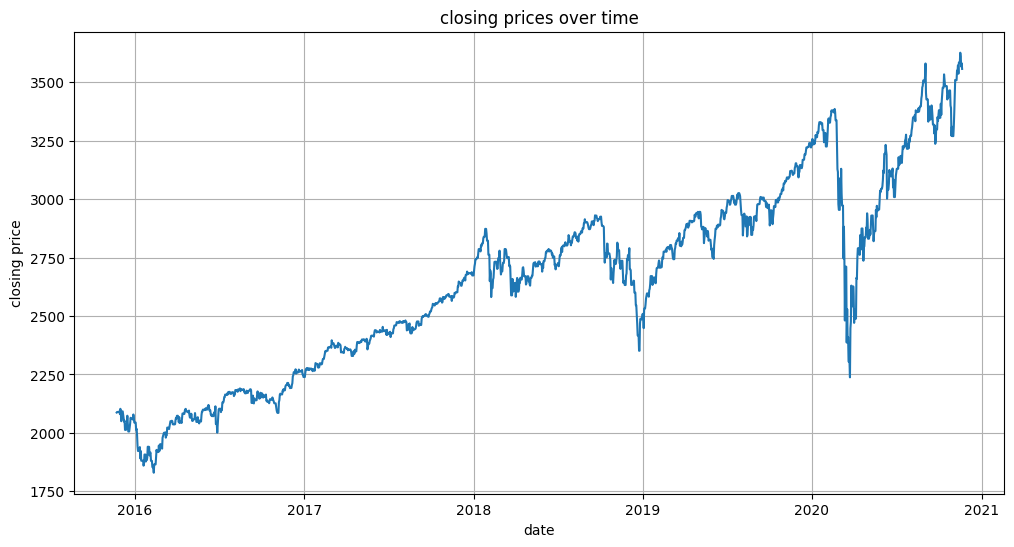

In [8]:
#Plot closing prices over time
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('closing prices over time')
plt.xlabel('date')
plt.ylabel('closing price')
plt.grid('True')
plt.show()

In [10]:
 # Check for stationarity using Augmented Dickey-Fuller test
 result= adfuller(df['Close'])
 print('ADF Statistic:', result[0])
 print('p-value:', result[1])
if result[1] > 0.05:
    print("Data is not stationary. Applying first difference...")
    df['Close_diff'] = df['Close'].diff().dropna()
else:
    print("Data is stationary.")

ADF Statistic: -0.8703973870161453
p-value: 0.7975646340657463
Data is not stationary. Applying first difference...


In [11]:
#ARIMA model (for short-term forecasting)

model_arima = ARIMA(df['Close'], order=(5,1,0))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=30)
print(forecast_arima)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2020-11-21    3558.558064
2020-11-22    3555.742332
2020-11-23    3556.677511
2020-11-24    3554.851328
2020-11-25    3555.716688
2020-11-26    3555.325772
2020-11-27    3555.471216
2020-11-28    3555.353494
2020-11-29    3555.449182
2020-11-30    3555.392322
2020-12-01    3555.419164
2020-12-02    3555.406364
2020-12-03    3555.414927
2020-12-04    3555.408914
2020-12-05    3555.412548
2020-12-06    3555.410682
2020-12-07    3555.411666
2020-12-08    3555.411059
2020-12-09    3555.411455
2020-12-10    3555.411218
2020-12-11    3555.411348
2020-12-12    3555.411276
2020-12-13    3555.411319
2020-12-14    3555.411293
2020-12-15    3555.411308
2020-12-16    3555.411299
2020-12-17    3555.411304
2020-12-18    3555.411302
2020-12-19    3555.411303
2020-12-20    3555.411302
Freq: D, Name: predicted_mean, dtype: float64


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7p58hjn/qczruvbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7p58hjn/0pixrjoh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46154', 'data', 'file=/tmp/tmpy7p58hjn/qczruvbi.json', 'init=/tmp/tmpy7p58hjn/0pixrjoh.json', 'output', 'file=/tmp/tmpy7p58hjn/prophet_modelgsenmb6v/prophet_model-20250719111427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:14:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:14:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


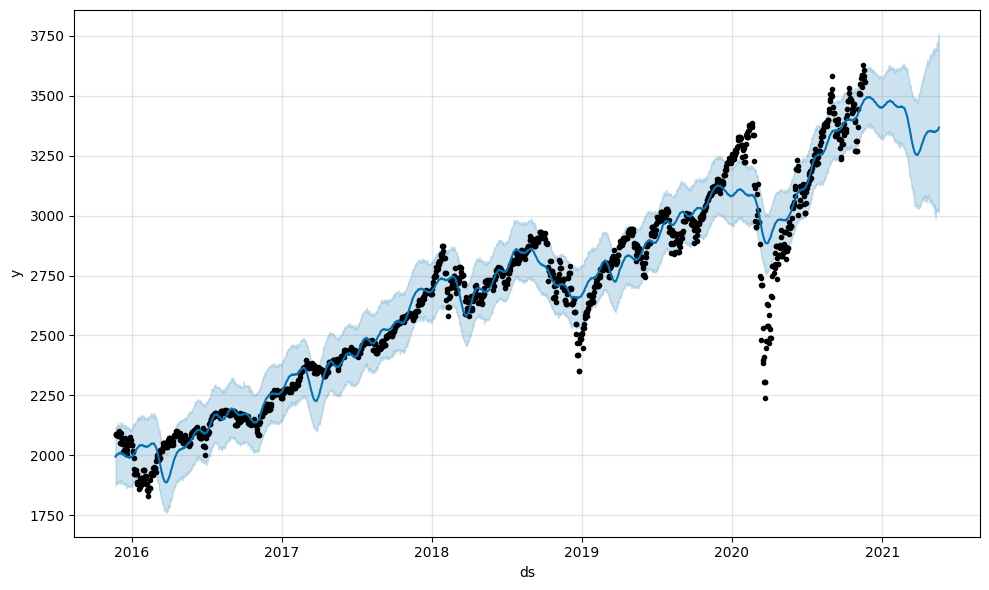

In [12]:
#  Prophet model (for long-term + seasonal forecasting)
df_prophet = df.reset_index()[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future = model_prophet.make_future_dataframe(periods=180)
forecast_prophet = model_prophet.predict(future)
model_prophet.plot(forecast_prophet)
plt.show()

In [13]:
# LSTM Model (deep learning-based)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
X_train, y_train = [], []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0889
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0055
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0014
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.7179e-04
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 5.1030e-04
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 5.0449e-04
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 5.0094e-04
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.9260e-04
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 4.8355e-04
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.4048e-04


In [14]:
#Export processed data for Power BI
df.reset_index().to_csv('processed_yahoo_stock.csv', index=False)
from google.colab import files
files.download('processed_yahoo_stock.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>